In [6]:
import numpy as np
import pocomc as pc
import corner

In [7]:
d = np.load("../results/pc/results_24bins_sweep.npz", allow_pickle=True)
results = d["results"][()]
true_params = d["true_params"][()]

In [8]:
bins = list(results.keys())
nfg = list(results[bins[0]].keys())
best = []  # nfg with max evidence

for b in bins:
    print(f"Bin {b}:")
    print("----------")
    bic_min = np.inf
    for n in nfg:
        bic = results[b][n]["bic"]
        if bic < bic_min:
            bic_min = bic
            best_n = n
        chi2_r = bic - (n+3)*np.log(61)
        chi2_r /= (61 - n - 3)
        print(f"nfg={n}, bic={bic:.3f}, chi2_r={chi2_r:.3f}")
    best.append(best_n)
    print(best_n)
    print("\n")

Bin 0:
----------
nfg=4, bic=75.024, chi2_r=0.856
nfg=5, bic=630.485, chi2_r=11.275
nfg=6, bic=200.610, chi2_r=3.146
nfg=7, bic=133.218, chi2_r=1.806
nfg=8, bic=114.693, chi2_r=1.389
4


Bin 1:
----------
nfg=4, bic=86.266, chi2_r=1.065
nfg=5, bic=90.575, chi2_r=1.088
nfg=6, bic=276.454, chi2_r=4.605
nfg=7, bic=107.974, chi2_r=1.311
nfg=8, bic=123.786, chi2_r=1.571
4


Bin 2:
----------
nfg=4, bic=88.752, chi2_r=1.111
nfg=5, bic=271.060, chi2_r=4.494
nfg=6, bic=185.160, chi2_r=2.849
nfg=7, bic=112.727, chi2_r=1.404
nfg=8, bic=132.192, chi2_r=1.739
4


Bin 3:
----------
nfg=4, bic=112.216, chi2_r=1.545
nfg=5, bic=101.270, chi2_r=1.290
nfg=6, bic=230.366, chi2_r=3.719
nfg=7, bic=142.017, chi2_r=1.979
nfg=8, bic=152.588, chi2_r=2.147
5


Bin 4:
----------
nfg=4, bic=100.404, chi2_r=1.326
nfg=5, bic=105.339, chi2_r=1.367
nfg=6, bic=359.893, chi2_r=6.210
nfg=7, bic=128.798, chi2_r=1.719
nfg=8, bic=139.138, chi2_r=1.878
4


Bin 5:
----------
nfg=4, bic=74.849, chi2_r=0.853
nfg=5, bic=78.810,

In [9]:
def print_stats(results):
    estimated_params = results["theta_map"]
    std_vals = np.std(results['samples'], axis=0)
    print('Mean values = ', estimated_params)
    print('Standard deviation values = ', std_vals)
    print()
    print(f"Relative errors %: {100 * np.abs(1 - np.array(list(true_params.values())) /estimated_params)}")
    print(f"Number of sigmas from truth: {np.abs(estimated_params-np.array(list(true_params.values())))/std_vals}")

def plot(r, labels=["a", "w", "$\\nu_{21}$"]):
    _ = corner.corner(r["samples"], labels=labels, color="royalblue", truths=list(true_params.values()), truth_color="k")
    return

In [10]:
print(best)

[4, 4, 4, 5, 4, 4, 4, 4, 5, 4, 6, 4, 5, 4, 4, 5, 4, 4, 4, 5, 4, 4, 5, 4]


Mean values =  [-0.31052734 24.83075323 80.44293564]
Standard deviation values =  [0.06206829 2.33863825 0.6058154 ]

Relative errors %: [35.59343211 19.45471885  0.55062092]
Number of sigmas from truth: [1.78073756 2.06562654 0.73113961]


Mean values =  [-0.22648625 22.59852571 79.81658478]
Standard deviation values =  [0.22096021 3.64575956 3.38022909]

Relative errors %: [11.69441747 11.49865147  0.22979588]
Number of sigmas from truth: [0.11986885 0.7127529  0.05426118]


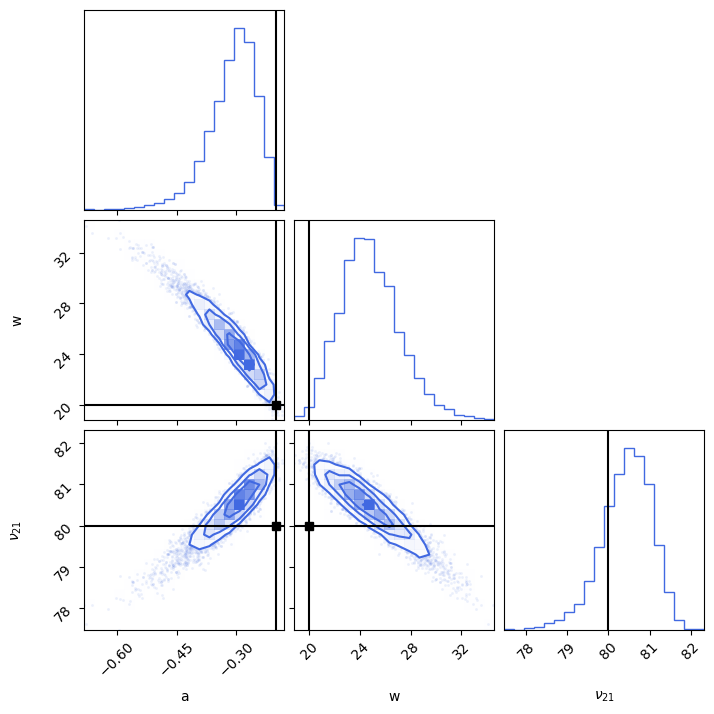

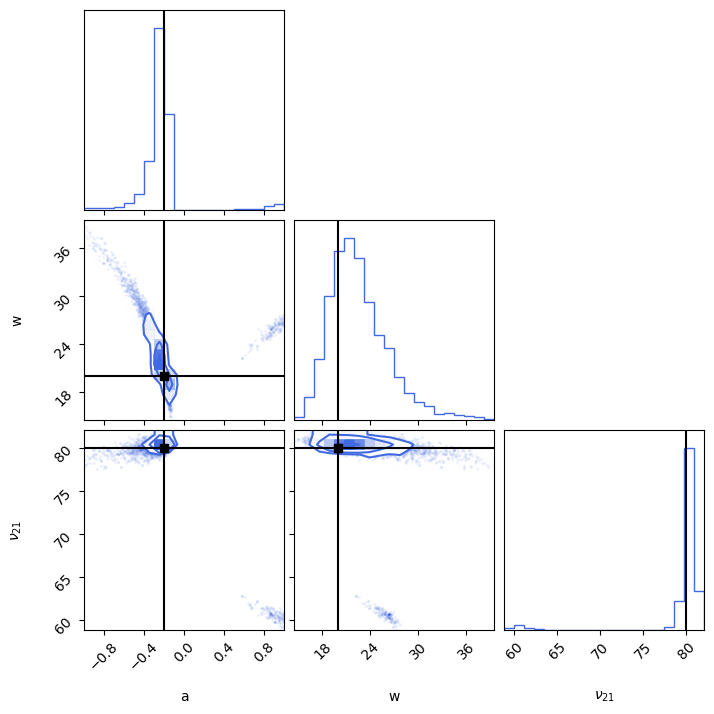

In [11]:
r1 = results[1][4]
r2 = results[1][5]

plot(r1)
print_stats(r1)

plot(r2)
print_stats(r2)

Mean values =  [-0.22806664 19.5434615  79.00890935]
Standard deviation values =  [0.02889957 1.54708536 0.37110914]

Relative errors %: [12.30633135  2.33601656  1.25440366]
Number of sigmas from truth: [0.97117821 0.29509587 2.6706177 ]
------------
Mean values =  [-0.21749028 20.21646587 79.63446377]
Standard deviation values =  [0.03587494 1.93756426 0.48675098]

Relative errors %: [8.04186639 1.07074043 0.45901763]
Number of sigmas from truth: [0.48753465 0.11172062 0.75097174]
------------
Mean values =  [-0.27334557 21.39511345 78.53091953]
Standard deviation values =  [0.04934627 2.08796551 0.504088  ]

Relative errors %: [26.83254349  6.52071067  1.87070326]
Number of sigmas from truth: [1.48634461 0.66816882 2.91433334]
------------
Mean values =  [-0.18427203 18.32211862 79.75800717]
Standard deviation values =  [0.02474032 1.71699474 0.40683318]

Relative errors %: [8.53518972 9.1576821  0.30340882]
Number of sigmas from truth: [0.63572199 0.97721987 0.59482078]
-----------

Mean values =  [-0.36277384 25.24992267 78.33396851]
Standard deviation values =  [0.09079    2.69556665 0.71593881]

Relative errors %: [44.86923282 20.79183663  2.12683147]
Number of sigmas from truth: [1.79286083 1.94761375 2.32705849]
------------
Mean values =  [ 0.175437   13.37504098 69.09243215]
Standard deviation values =  [0.06340389 1.7241801  1.79886661]

Relative errors %: [214.0010376   49.53225214  15.78692124]
Number of sigmas from truth: [5.92135556 3.84238225 6.06357792]
------------


Mean values =  [-0.36826438 24.89769254 79.52325687]
Standard deviation values =  [0.15259059 3.39160295 2.41409549]

Relative errors %: [45.69119092 19.67127088  0.59950152]
Number of sigmas from truth: [1.10271795 1.44406424 0.19748313]
------------
Mean values =  [-0.23483224 20.00743459 79.62418927]
Standard deviation values =  [0.03255465 1.65617474 0.40034062]

Relative errors %: [14.83281952  0.03715915  0.4719806 ]
Number of sigmas from truth: [1.06996227 0.00448901 0.93872745]
------------
Mean values =  [-0.34624769 24.61992429 78.23791427]
Standard deviation values =  [0.08877231 2.71036231 0.70920621]

Relative errors %: [42.23788218 18.76498172  2.25221461]
Number of sigmas from truth: [1.64744711 1.70454122 2.4845887 ]
------------
Mean values =  [-0.29995656 22.80460782 80.25565197]
Standard deviation values =  [0.1332183  3.33657075 2.60526626]

Relative errors %: [33.32367952 12.29842602  0.318547  ]
Number of sigmas from truth: [0.75032157 0.84056597 0.09812892]
-----

/home/christian/Documents/research/MIST/mistsim/.venv/lib/python3.10/site-packages/corner/core.py:126: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = pl.subplots(K, K, figsize=(dim, dim))


Mean values =  [-0.27644811 22.09630132 80.31626821]
Standard deviation values =  [0.09561102 2.76807288 1.95764166]

Relative errors %: [27.65369134  9.4871141   0.39377852]
Number of sigmas from truth: [0.79957421 0.75731435 0.16155572]
------------
Mean values =  [-0.20963053 19.66356671 79.24650593]
Standard deviation values =  [0.03463527 1.96589361 0.47991243]

Relative errors %: [4.59405108 1.71094742 0.95082308]
Number of sigmas from truth: [0.27805572 0.17113504 1.57006576]
------------
Mean values =  [-0.28192965 21.89707874 80.71544361]
Standard deviation values =  [0.09366708 2.88057508 1.11834311]

Relative errors %: [29.06031813  8.66361564  0.8863776 ]
Number of sigmas from truth: [0.87468992 0.65857639 0.63973535]
------------
Mean values =  [-0.2710621  23.19658865 78.17420611]
Standard deviation values =  [0.08680525 3.24405771 0.85031734]

Relative errors %: [26.21617088 13.78042565  2.33554516]
Number of sigmas from truth: [0.81863835 0.98536738 2.14719118]
--------

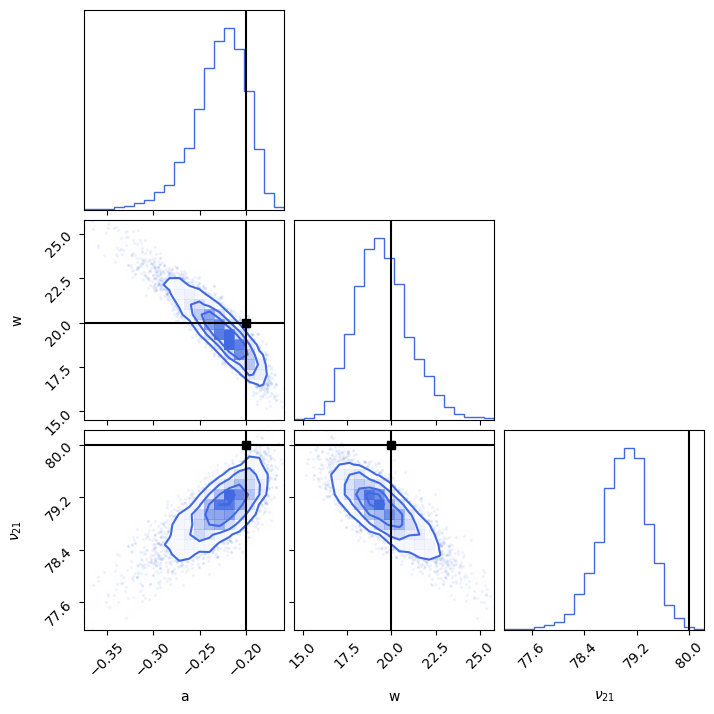

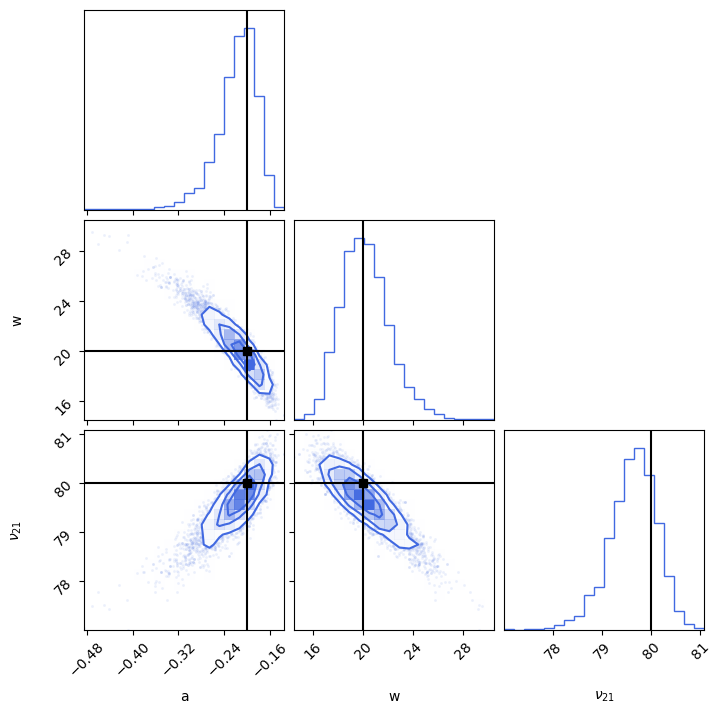

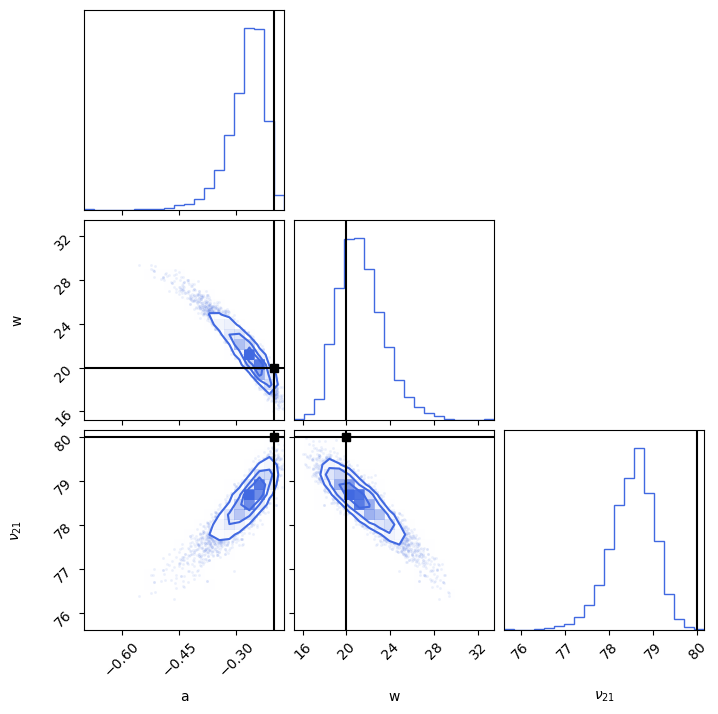

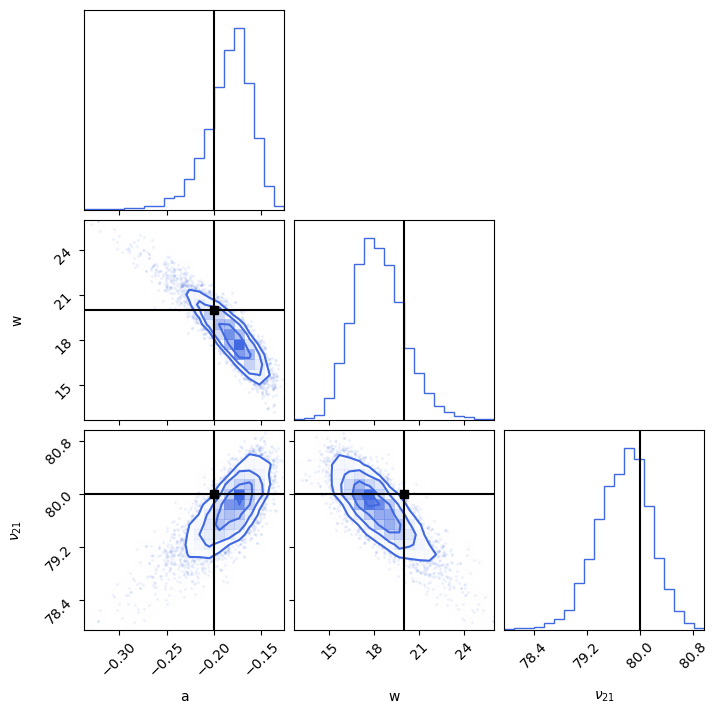

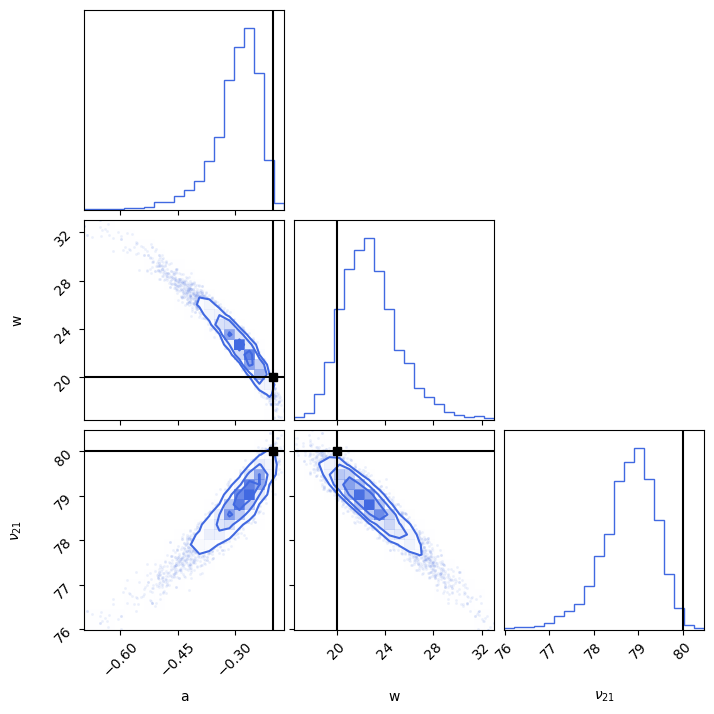

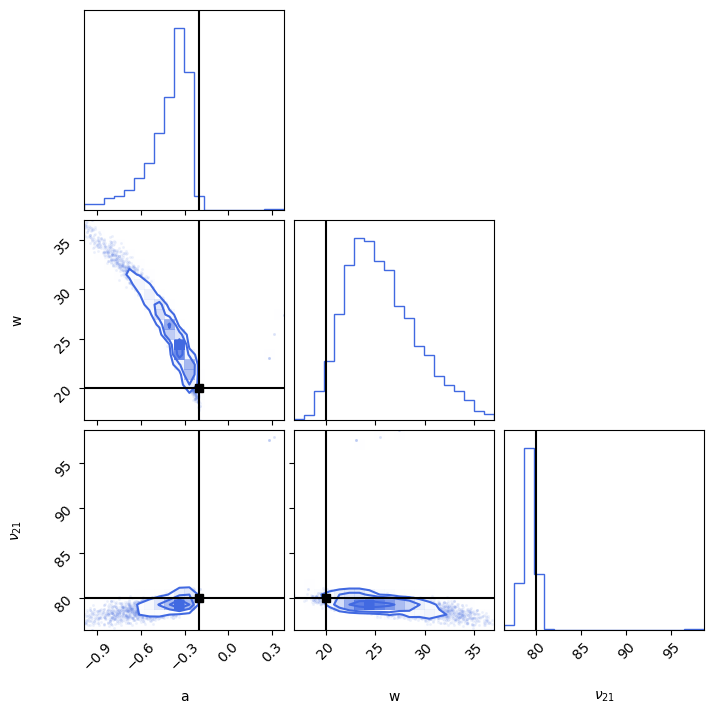

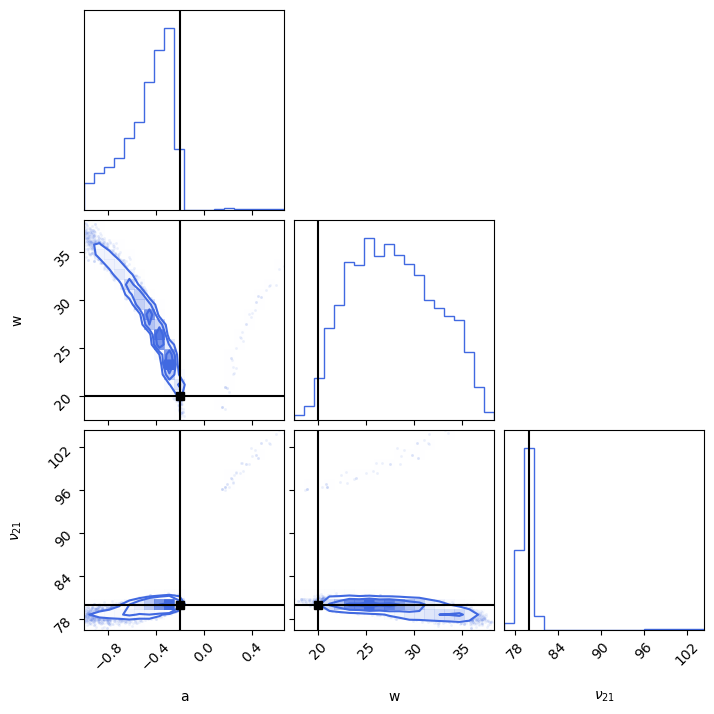

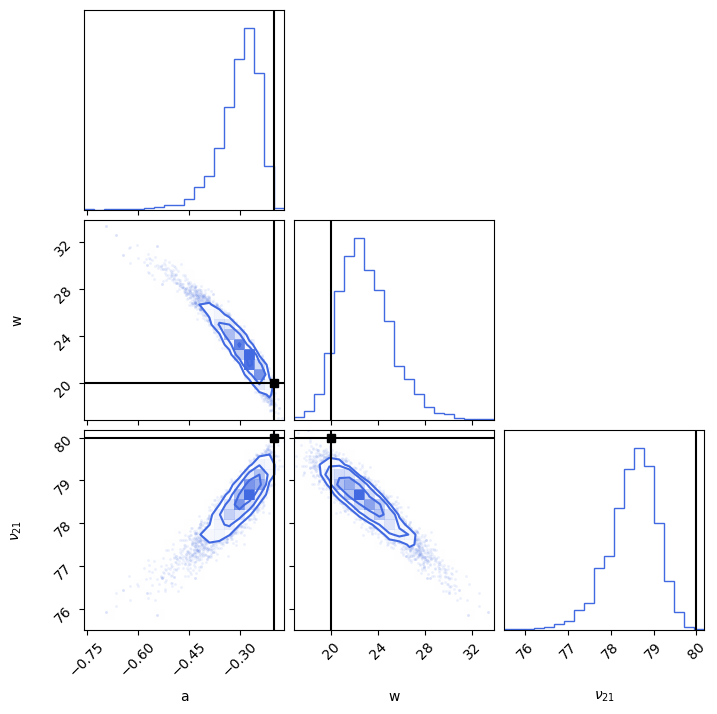

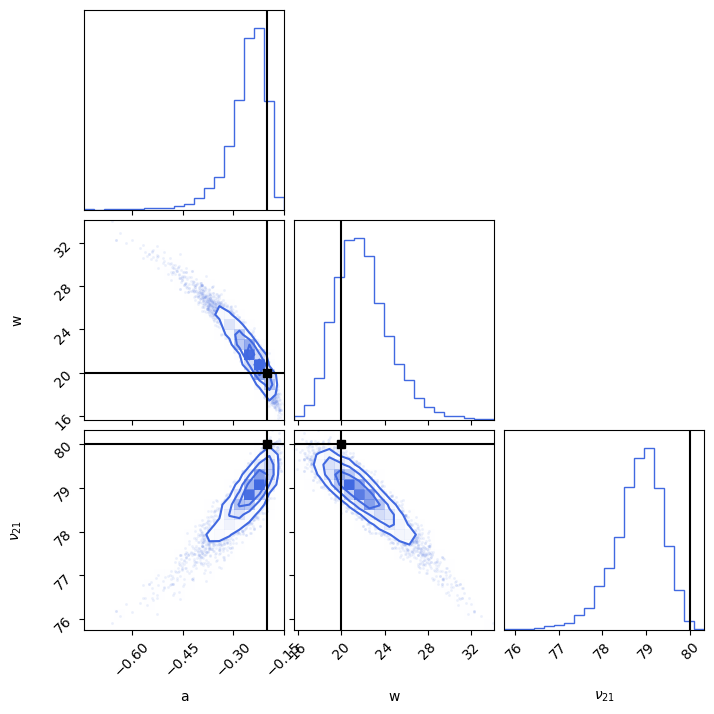

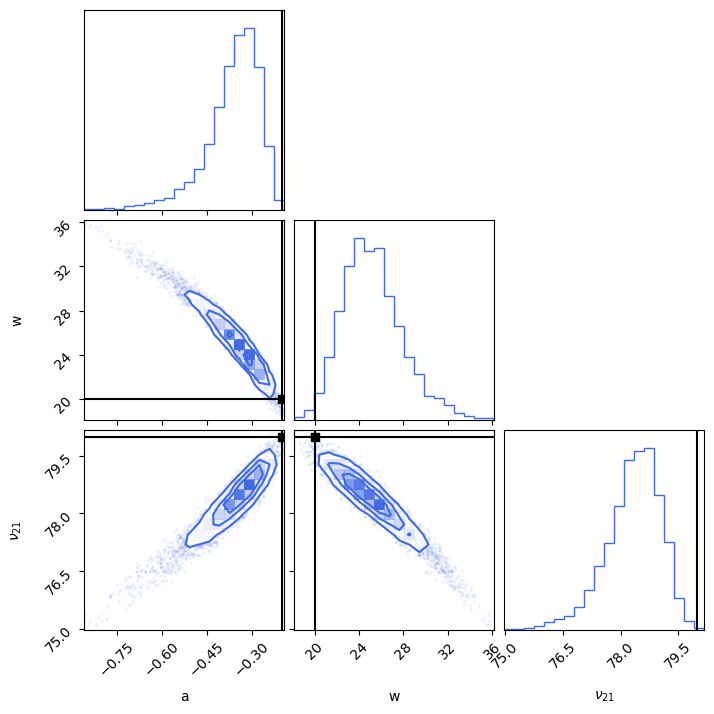

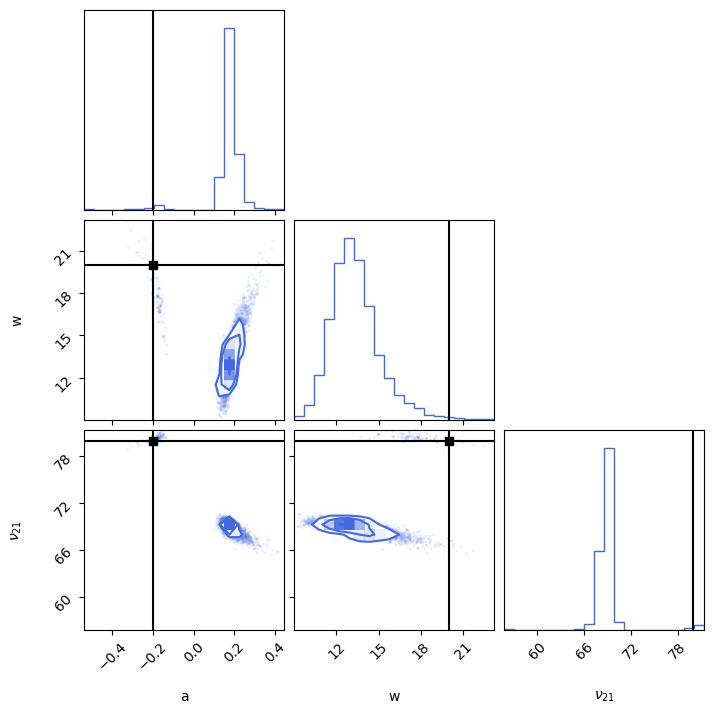

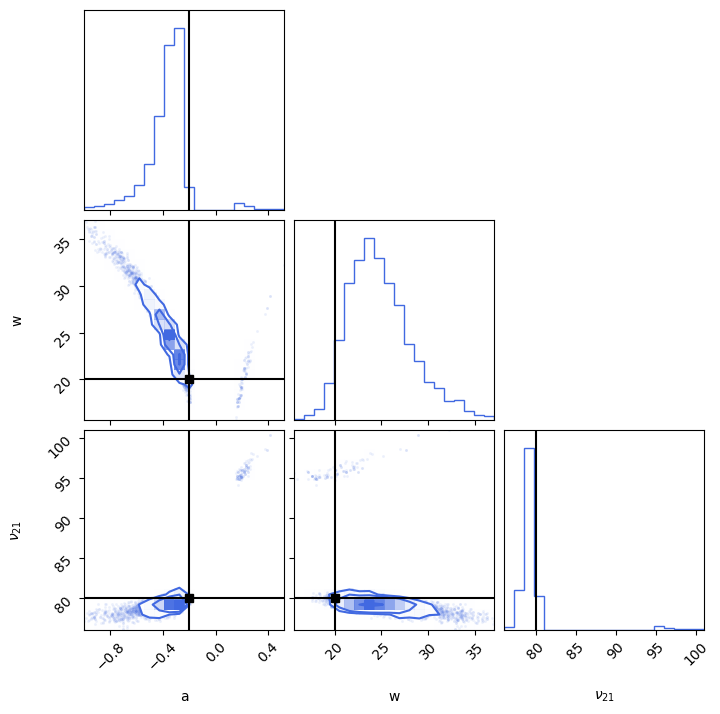

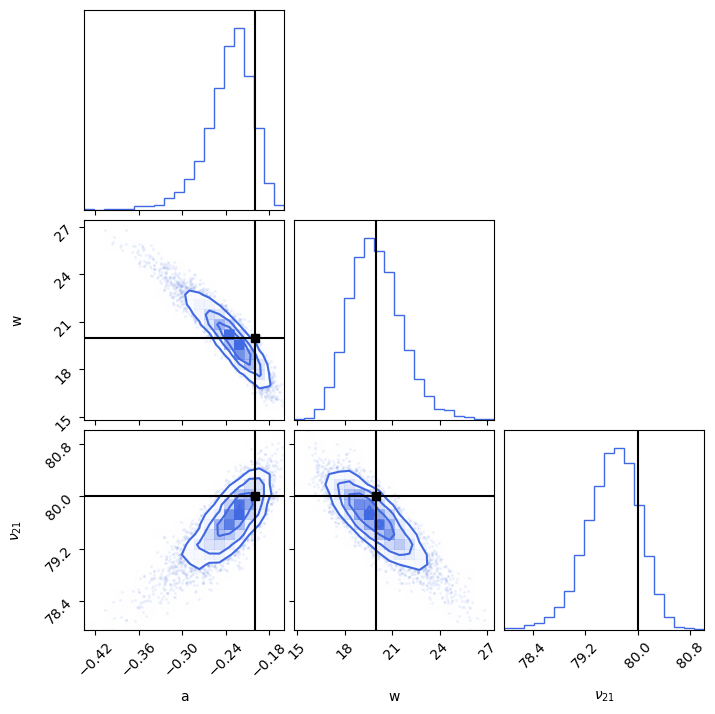

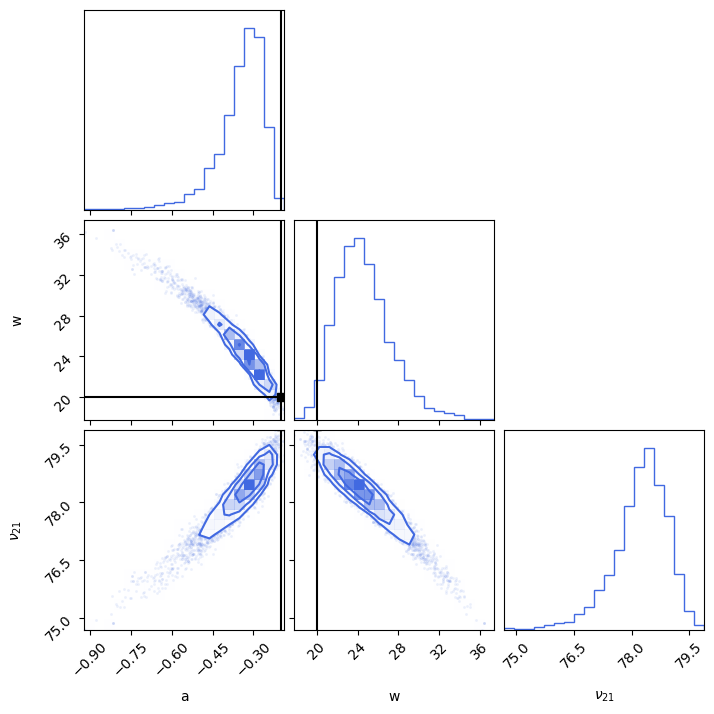

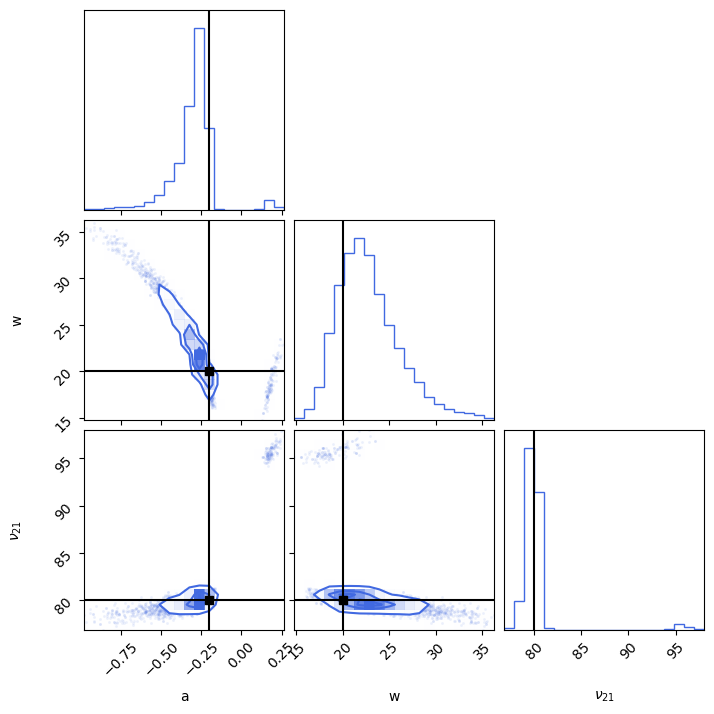

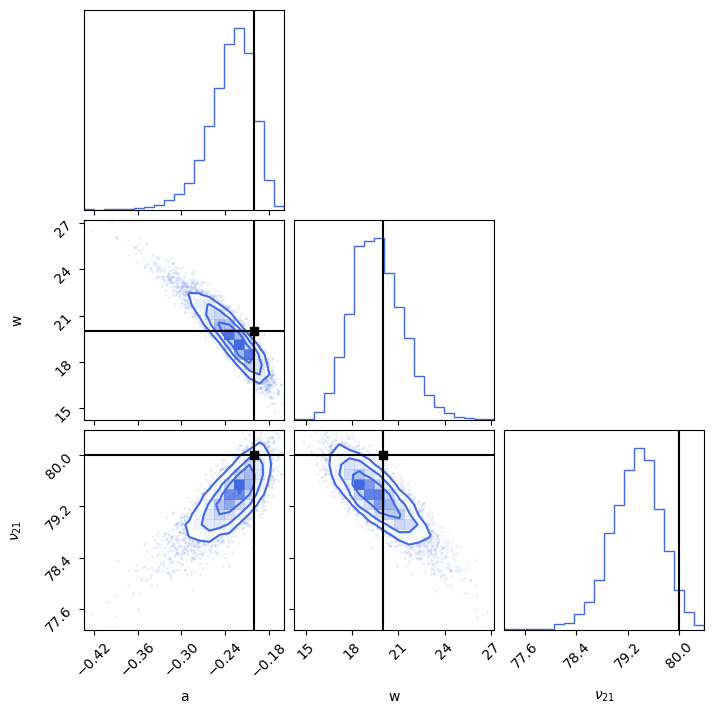

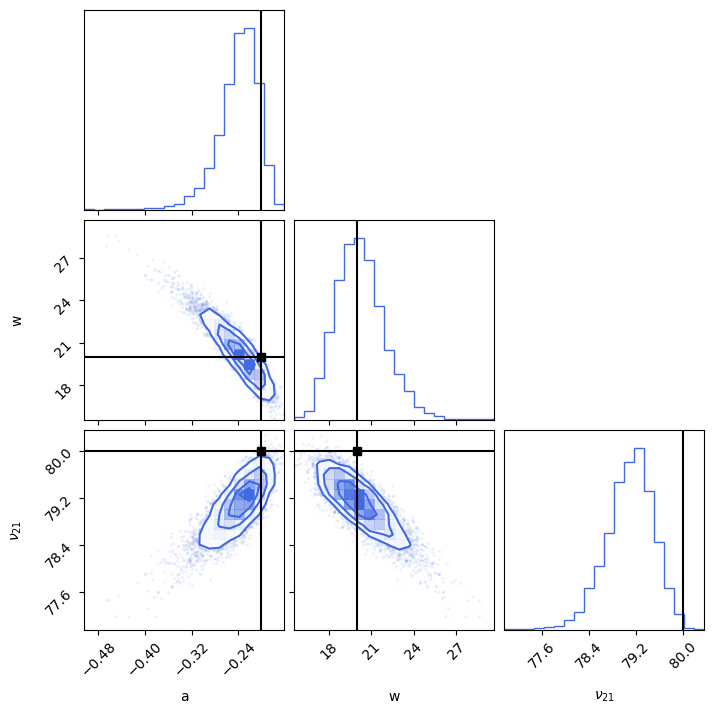

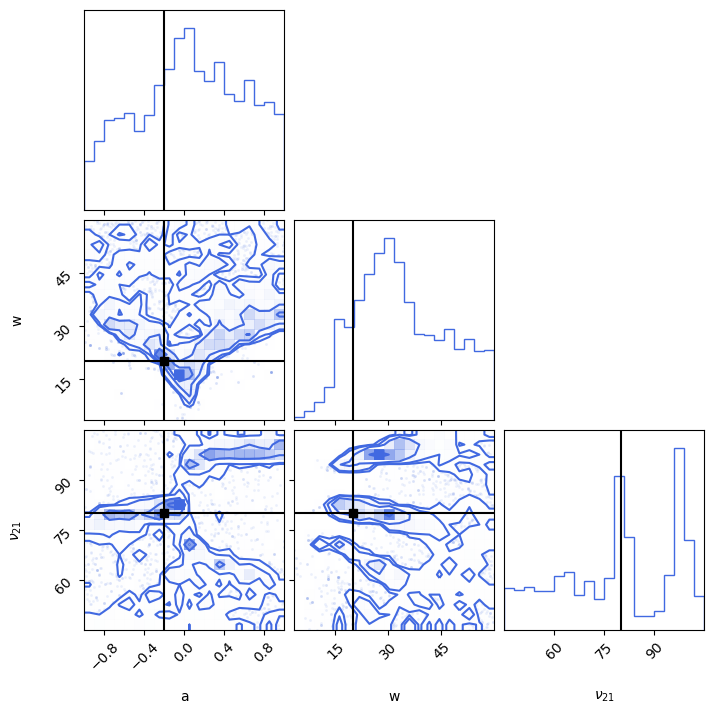

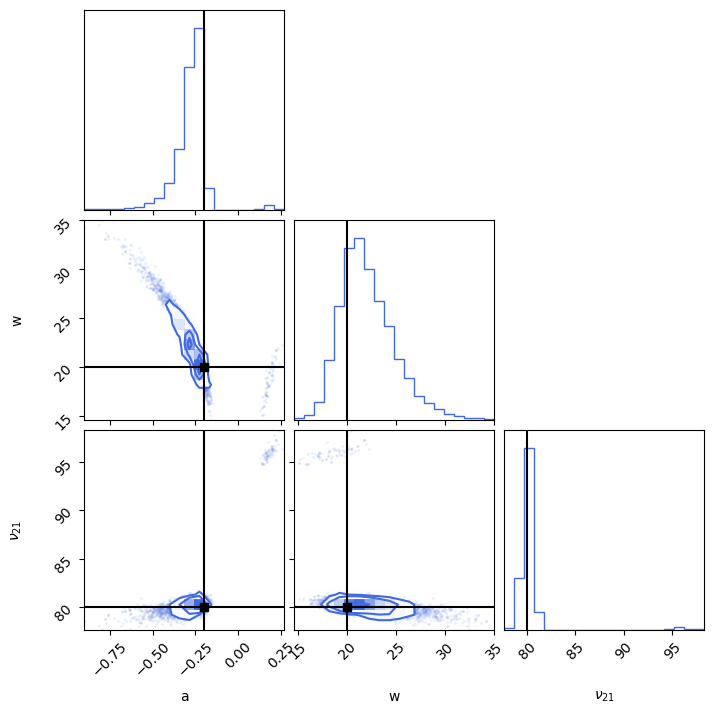

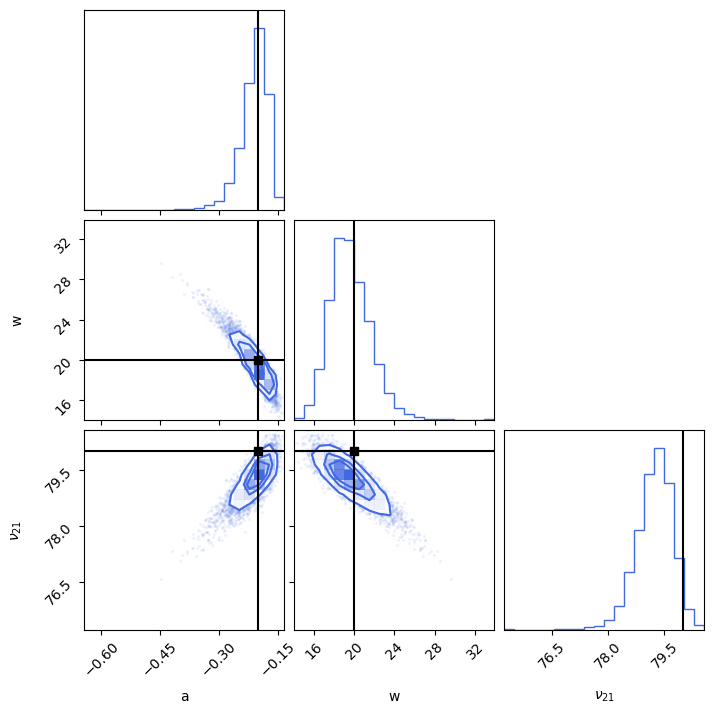

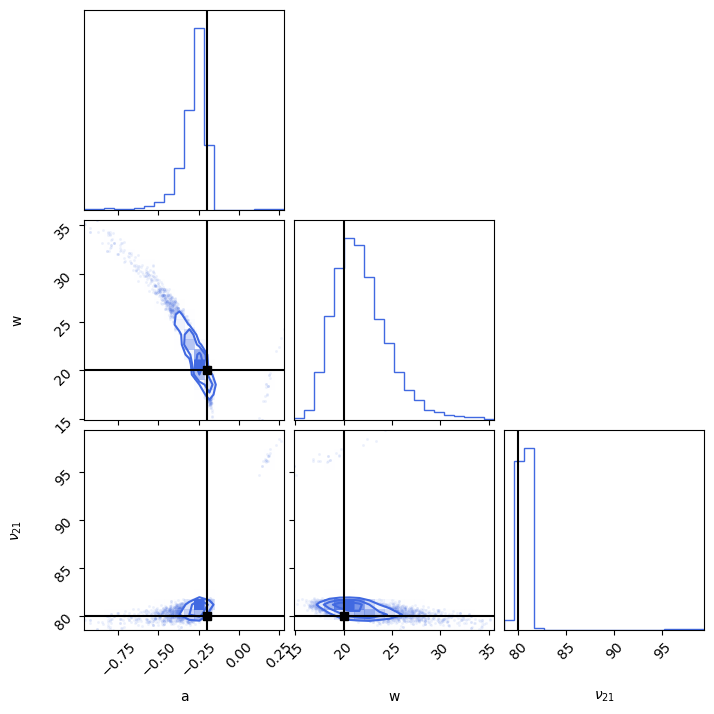

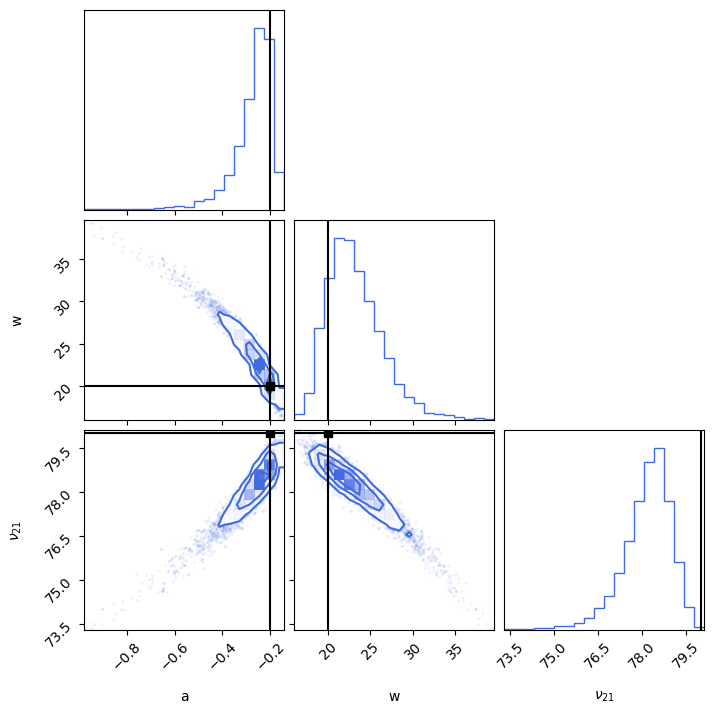

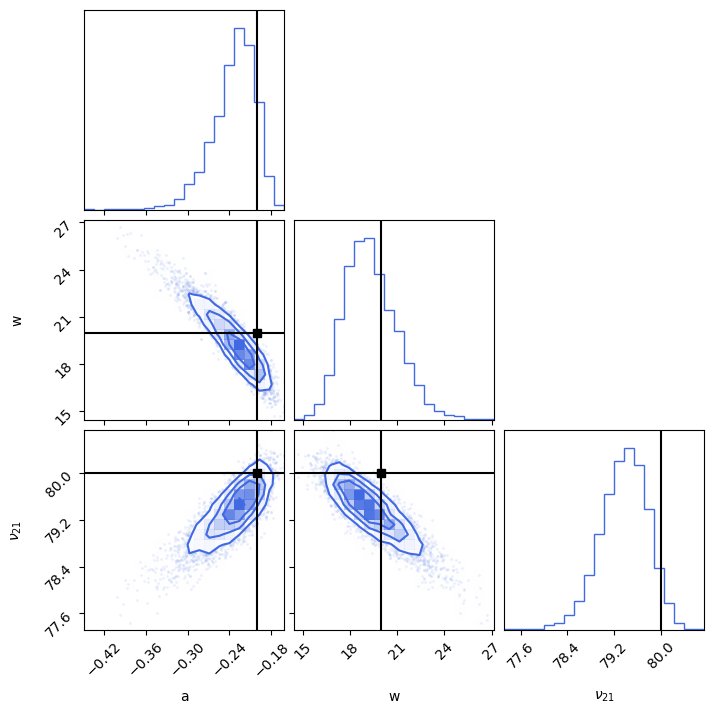

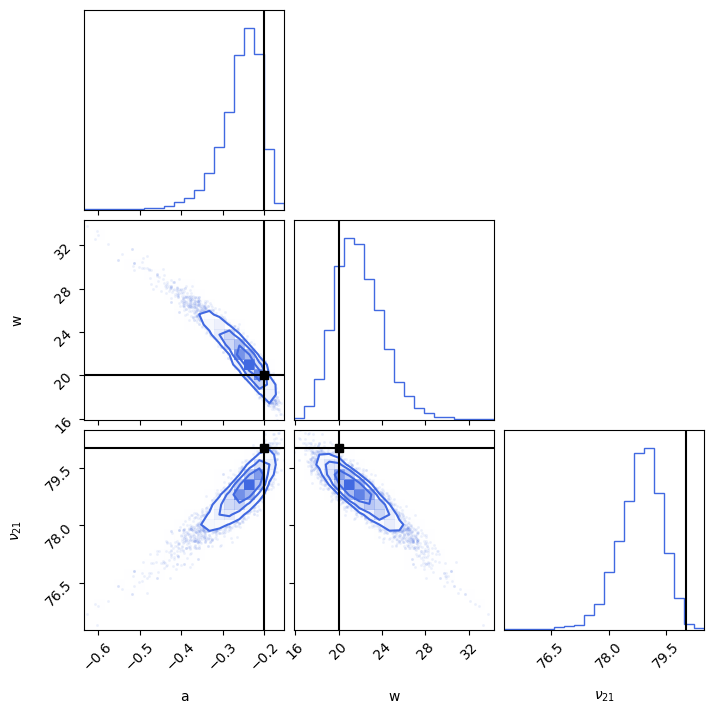

In [6]:
for i in range(len(results)):
    r = results[i][best[i]]
    plot(r)
    print_stats(r)
    print("------------")